(-1.1, 1.1)

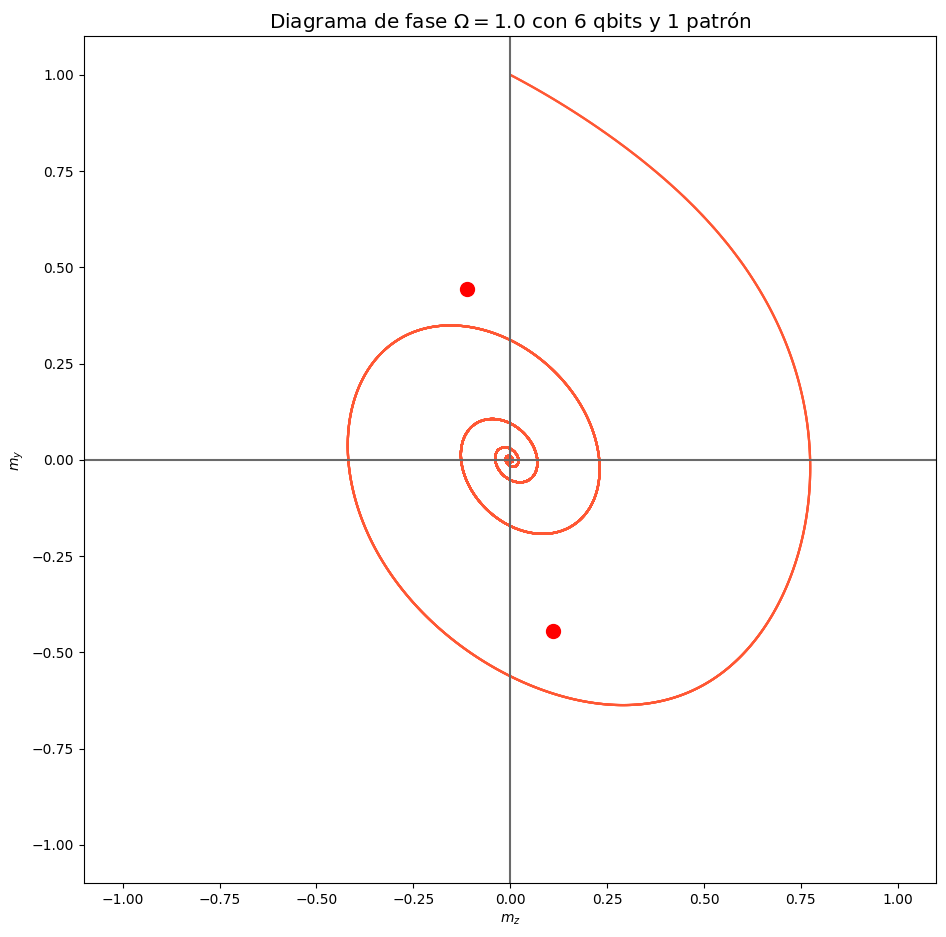

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Total de lineas que se van a utilizar para representar el fichero

Omega=1.0
patrones=1
qbits=6

mz=np.genfromtxt("mzT.dat")[0:-1]
my=np.genfromtxt("myT.dat")[0:-1]
mzm=np.genfromtxt("mzT.dat")[0:-1]
mym=np.genfromtxt("myT.dat")[0:-1]
mzT=np.genfromtxt("mzT.dat")[0:-1]
myT=np.genfromtxt("myT.dat")[0:-1]

total:int=mz.shape[0]
inicio=0

#Necesitamos generar ahora a los vectores que nos van a llevar  de un estado a otro para ello escogemos solo 10 puntos
filas=50000
columnas=1


#Numero de divisines que cogemos para representar
particion:int=int(total/filas)


#Sacmos los puntos que vamos a representar
X=np.zeros((filas,columnas))
Y=np.zeros((filas,columnas))
Xm=np.zeros((filas,columnas))
Ym=np.zeros((filas,columnas))

for i in range(filas):
    X[i]=mz[particion*i]
    Y[i]=my[particion*i]
    Xm[i]=mzm[particion*i]
    Ym[i]=mym[particion*i]

#Calculamos los vectores directores de la red
u=X[1:filas]-X[0:filas-1]
v=Y[1:filas]-Y[0:filas-1]
um=Xm[1:filas]-Xm[0:filas-1]
vm=Ym[1:filas]-Ym[0:filas-1]

#Gradicamos el campo vectorial

plt.figure(1,figsize=(11,11))

plt.axvline(0.0,color="#6a6a6a")
plt.axhline(0.0,color="#6a6a6a")


colores=["#ff5733","#a833ff","#33f6ff","#ff33f3","#09893d","#9eae00","#8a7f2c","#8a2c2c","#502eac","#2eaca4","#aca82e","#2e5aac"]

for i in range(columnas):
    plt.quiver(X[0:filas-1],Y[0:filas-1],u[:],v[:],scale_units="xy",angles='xy',scale=1,color=colores[i],width=0.003)
    plt.quiver(Xm[0:filas-1],Ym[0:filas-1],um[:],vm[:],scale_units="xy",angles='xy',scale=1,color=colores[i],width=0.003)


plt.xlabel(r"$m_{z}$")
plt.ylabel(r"$m_{y}$")

plt.title(r"Diagrama de fase $\Omega="+str(Omega)+"$ con $"+str(qbits)+"$ qbits y "+str(patrones)+" patrón",fontsize="x-large")


plt.plot(1/(1+8.0*Omega**2),-4.0*Omega/(1+8.0*Omega**2),marker="o",markersize=10.0,linewidth=0.0,color="red")
plt.plot(-1/(1+8.0*Omega**2),4.0*Omega/(1+8.0*Omega**2),marker="o",markersize=10.0,linewidth=0.0,color="red")

ylim=1.1
xlim=1.1


#plt.rcParams.update({'legend.fontsize': 10})

plt.xlim(-ylim,ylim)
plt.ylim(-xlim,xlim)



(-1.1, 1.1)

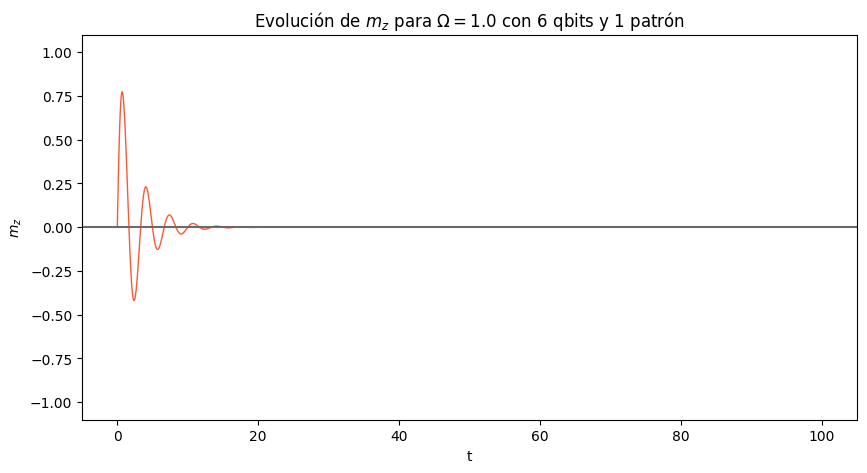

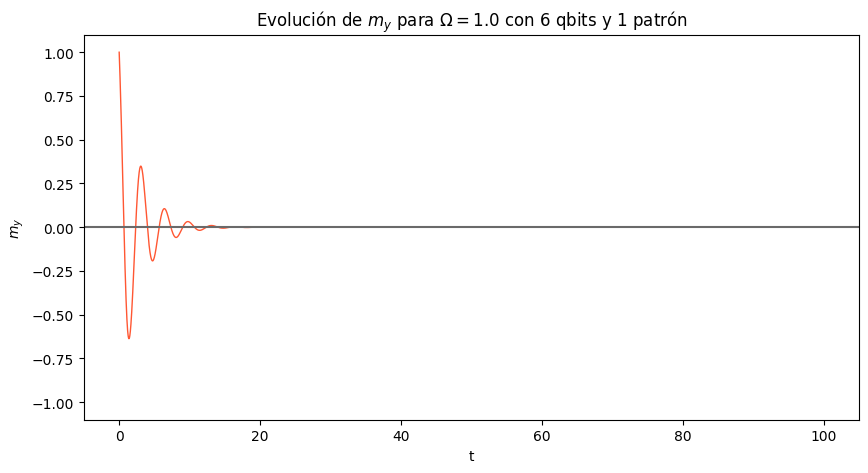

In [2]:
#Hacemos gráficas para estudiar la evolución temporal de la magenetización en el tiempo
t=np.arange(4*inicio,4*total,4)/10000
plt.figure(7,figsize=(10,5))
plt.title(r"Evolución de $m_{z}$ para $\Omega="+str(Omega)+"$ con $"+str(qbits)+"$ qbits y "+str(patrones)+" patrón",fontsize="large")

plt.xlabel(r"t")
plt.ylabel(r"$m_{z}$")

for i in range(columnas):
    plt.plot(t,mzT[inicio:total],color=colores[i],linewidth=1.0)
plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)

plt.figure(6,figsize=(10,5))

plt.title(r"Evolución de $m_{y}$ para $\Omega="+str(Omega)+"$ con $"+str(qbits)+"$ qbits y "+str(patrones)+" patrón",fontsize="large")


plt.xlabel(r"t")
plt.ylabel(r"$m_{y}$")

for i in range(columnas):
    plt.plot(t,myT[inicio:total],color=colores[i],linewidth=1.0)
plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)


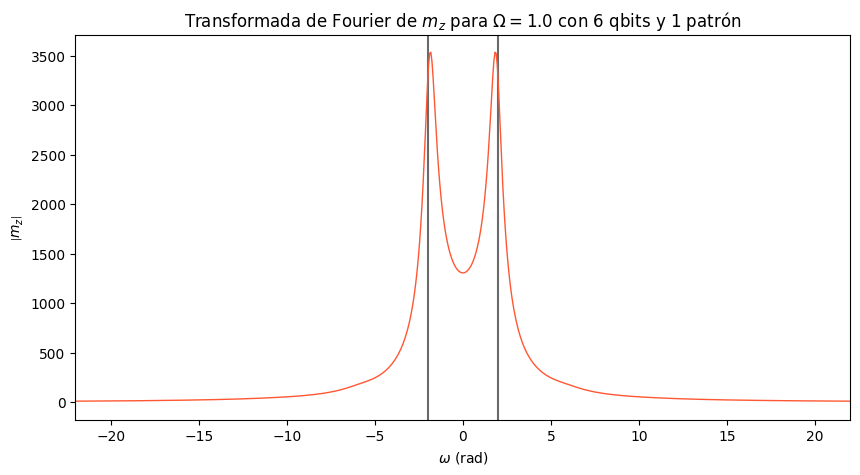

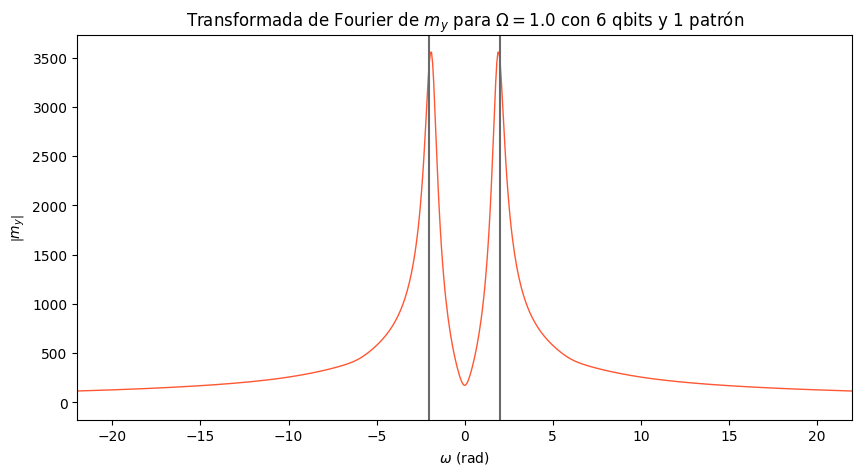

In [3]:
#Hacemos la transformada de Fourier
MzT=np.fft.fft(mzT)
MyT=np.fft.fft(myT)
Freq=np.fft.fftshift(np.fft.fftfreq(t.size,t[1]-t[0]))



plt.figure(8,figsize=(10,5))
plt.title(r"Transformada de Fourier de $m_{z}$ para $\Omega="+str(Omega)+"$ con $"+str(qbits)+"$ qbits y "+str(patrones)+" patrón",fontsize="large")

plt.axvline(2.0*Omega,color="#6a6a6a")
plt.axvline(-2.0*Omega,color="#6a6a6a")

plt.xlabel(r"$\omega$ (rad)")
plt.ylabel(r"$\left|m_{z}\right|$")

plt.xlim(-20-2*Omega,20+2*Omega)

for i in range(columnas):
    plt.plot(2*np.pi*Freq,np.abs(np.fft.fftshift(MzT[inicio:total])),color=colores[i],linewidth=1.0)





plt.figure(9,figsize=(10,5))

plt.title(r"Transformada de Fourier de $m_{y}$ para $\Omega="+str(Omega)+"$ con $"+str(qbits)+"$ qbits y "+str(patrones)+" patrón",fontsize="large")
plt.xlim(-20-2*Omega,20+2*Omega)

plt.xlabel(r"$\omega$ (rad)")
plt.ylabel(r"$\left|m_{y}\right|$")

for i in range(columnas):
    plt.plot(2*np.pi*Freq,np.abs(np.fft.fftshift(MyT[inicio:total])),color=colores[i],linewidth=1.0)

plt.axvline(2.0*Omega,color="#6a6a6a")
plt.axvline(-2.0*Omega,color="#6a6a6a")
